In [115]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split

A_fib = pd.read_csv("A_fib.csv")
A_fib_tachy = pd.read_csv("A_fib_tachy.csv")
Ectopy1 = pd.read_csv("Ectopy1.csv")
Normal = pd.read_csv("Normal.csv")
brady = pd.read_csv("brady.csv")
tachy = pd.read_csv("tachy.csv")


In [68]:
pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [95]:
A_fib['label'] = 'A_fib'
A_fib_tachy['label'] = 'A_fib_tachy'
Ectopy1['label'] = 'Ectopy1'
Normal['label'] = 'Normal'
brady['label'] = 'brady'
tachy['label'] = 'tachy'
df = pd.concat([A_fib, A_fib_tachy, Ectopy1, Normal, brady, tachy], ignore_index=True)
print(df.shape)
print(df['label'].value_counts())

(22506, 5)
label
A_fib          3751
A_fib_tachy    3751
Ectopy1        3751
Normal         3751
brady          3751
tachy          3751
Name: count, dtype: int64


In [96]:
df.head()

,Time,PPG,ECG,resp,label
0,0.000,0.537634,0.425781,-0.029340,A_fib
1,0.008,0.534702,0.404297,-0.036675,A_fib
2,0.016,0.531769,0.400391,-0.044010,A_fib
3,0.024,0.528837,0.400391,-0.053790,A_fib
4,0.032,0.524927,0.419922,-0.061125,A_fib


In [97]:
df['label'].value_counts()

label
A_fib          3751
A_fib_tachy    3751
Ectopy1        3751
Normal         3751
brady          3751
tachy          3751
Name: count, dtype: int64

In [98]:
df.isnull().sum()

Time     0
PPG      0
ECG      0
resp     0
label    0
dtype: int64

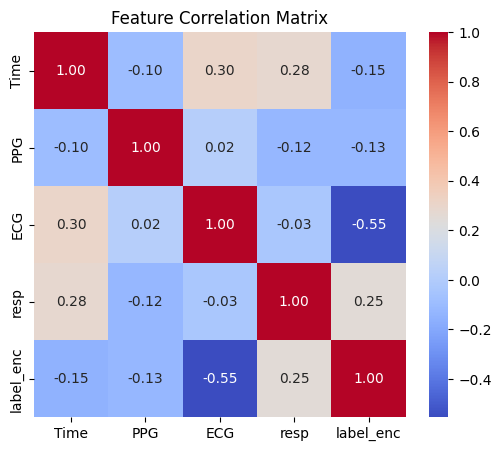

In [99]:
le = LabelEncoder()
df['label_enc'] = le.fit_transform(df['label'])
corr_matrix = df[['Time', 'PPG', 'ECG', 'resp', 'label_enc']].corr()
corr_matrix
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [100]:
df = df.drop(columns=['Time'])
df = df.drop(columns=['label_enc'])

In [101]:
from sklearn.preprocessing import StandardScaler
X = df.drop('label', axis=1)
y = df['label']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [102]:
le = LabelEncoder()
y= le.fit_transform(y)
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
label_mapping



{'A_fib': 0,
 'A_fib_tachy': 1,
 'Ectopy1': 2,
 'Normal': 3,
 'brady': 4,
 'tachy': 5}

In [103]:
X.head()

,PPG,ECG,resp
0,0.537634,0.425781,-0.029340
1,0.534702,0.404297,-0.036675
2,0.531769,0.400391,-0.044010
3,0.528837,0.400391,-0.053790
4,0.524927,0.419922,-0.061125


In [104]:
y

array([0, 0, 0, ..., 5, 5, 5])

In [105]:
z_scores = np.abs((X - X.mean()) / X.std())
outlier_mask = (z_scores >= 3).any(axis=1)

In [106]:
X.shape

(22506, 3)

In [107]:
y.shape

(22506,)

In [108]:
X_clean = X[~outlier_mask]
y_clean = y[~outlier_mask]



In [109]:
X_clean.shape

(21885, 3)

In [110]:
y_clean.shape

(21885,)

In [111]:
values, counts = np.unique(y_clean, return_counts=True)

In [112]:
print(values,':',counts)

[0 1 2 3 4 5] : [3657 3488 3624 3718 3728 3670]


In [113]:
X.info

<bound method DataFrame.info of             PPG       ECG      resp
0      0.537634  0.425781 -0.029340
1      0.534702  0.404297 -0.036675
2      0.531769  0.400391 -0.044010
3      0.528837  0.400391 -0.053790
4      0.524927  0.419922 -0.061125
...         ...       ...       ...
22501  0.535679 -0.082353  0.344403
22502  0.519062 -0.072549  0.349323
22503  0.502444 -0.082353  0.354244
22504  0.486804 -0.066667  0.360394
22505  0.471163 -0.086275  0.365314

[22506 rows x 3 columns]>

In [114]:
X.describe

<bound method NDFrame.describe of             PPG       ECG      resp
0      0.537634  0.425781 -0.029340
1      0.534702  0.404297 -0.036675
2      0.531769  0.400391 -0.044010
3      0.528837  0.400391 -0.053790
4      0.524927  0.419922 -0.061125
...         ...       ...       ...
22501  0.535679 -0.082353  0.344403
22502  0.519062 -0.072549  0.349323
22503  0.502444 -0.082353  0.354244
22504  0.486804 -0.066667  0.360394
22505  0.471163 -0.086275  0.365314

[22506 rows x 3 columns]>

In [116]:
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)
